In [1]:
#TAREA 3 (INTEGRACIÓN) - MÉTODOS COMPUTACIONALES (JUAN PABLO MARTÍNEZ Y SANTIAGO RODRÍGUEZ)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
import math

In [3]:
#Ejercicio 3.
a = 0
b = 1
funcion = lambda x: np.e**(-x**2)
#f"(x) alcanza un valor absoluto maximo de 2 para el intervalo [0,1] en ξ=0
#Por lo tanto, [(1-0)^3 / 12n^2]*2 = 0.005
#Resolviendo para n, n=5.77. Osea tomamos n=6
n = 6
x = np.linspace(a,b,n+1)
class Integrator:
    def __init__(self,x,y,n):
        self.x=x
        self.y=y
        self.h=(x[-1]-x[0])/n
        self.integral = 0.
class TrapezoidMethod(Integrator):
    def __init__(self,x,y,n):
        Integrator.__init__(self,x,y,n)
    def GetIntegral(self):
        self.integral = 0.
        self.integral += 0.5*( self.y[0]+self.y[-1] )
        self.integral += np.sum( self.y[1:-1] )
        return self.integral*self.h

integrador = TrapezoidMethod(x,funcion(x),n)
print(f"La integral definida por método del trapecio con el error máximo dado es igual a {integrador.GetIntegral()}")





La integral definida por método del trapecio con el error máximo dado es igual a 0.7451194124361793


In [4]:
#Ejercicio 6.
#Definimos la función
R = 0.5
a = 0.01
inductancia = lambda x: np.sqrt(a**2-x**2)/(x+R)
#Primero, método del trapecio
n=36
x=np.linspace(-a,a,n+1)
integrador6 = TrapezoidMethod(x, inductancia(x), n)
inductancia_trapecio = integrador6.GetIntegral()
inductancia_real = np.pi*(R-np.sqrt(R**2-a**2))
error_trapecio = np.abs((inductancia_trapecio-inductancia_real)/inductancia_real)*100
print(f"El resultado de la estimación con método del trapecio fue {inductancia_trapecio} y el valor real es {inductancia_real}")
print(f"Es decir,el error fue de {round(error_trapecio,2)}%")

El resultado de la estimación con método del trapecio fue 0.0003126527987679914 y el valor real es 0.0003141906875702543
Es decir,el error fue de 0.49%


In [5]:
#Ahora, usamos Simpson 1/3
n_simpson = 2 #Subintervalo par y en 1/3 debe ser 2
x_simpson=np.linspace(-a,a,n_simpson+1)
class SimpsonSimple(Integrator):
    def __init__(self,x,y,n):
        Integrator.__init__(self,x,y,n)
    def GetIntegral(self):
        self.integral = 0.
        self.integral += self.y[0] + 4*self.y[1:-1][0] + self.y[-1] #Se hace el segundo slicing porque solo son 3 valores
        #Entonces [1:-1] da el valor entre el primero y el ultimo, ya que solo hay uno en la mitad.
        return self.integral*(self.h/3)
inductancia_simpson = SimpsonSimple(x_simpson, inductancia(x_simpson),n_simpson).GetIntegral()
error_simpson = np.abs((inductancia_simpson-inductancia_real)/inductancia_real)*100
inductancia_simpson
print(f"El resultado de la estimación con método de 1/3 simpson fue {inductancia_simpson} y el valor real es {inductancia_real}")
print(f"Es decir,el error fue de {round(error_simpson,2)}%")


El resultado de la estimación con método de 1/3 simpson fue 0.0002666666666666667 y el valor real es 0.0003141906875702543
Es decir,el error fue de 15.13%


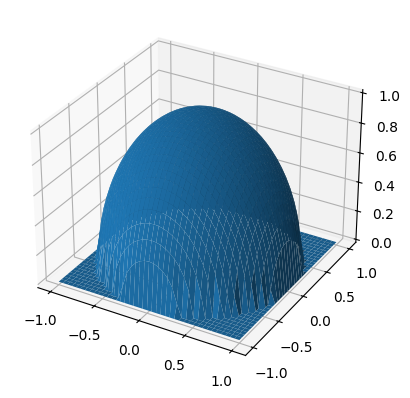

El volumen estimado fue 2.091776637767874


In [6]:
#Ejercicio 7.
R=1
n=40
def z(x,y,R=R):
    if x**2+y**2 > R**2:
        return 0
    else:
        return np.sqrt(R-(x**2+y**2))
#a. Creamos la grilla y graficamos la  esfera aproximada
x=np.linspace(-R,R,n+1)
y=np.linspace(-R,R,n+1)
X,Y = np.meshgrid(x,y)
Z=np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = z(X[i, j], Y[i, j])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, edgecolor='none')
plt.show()
#b. Calculamos el volumen estimado
volumen_total=0
for i in range(n):
    for j in range(n):
        x0, x1 = x[i],x[i+1]
        y0, y1 = y[j],y[j+1]

        z00 = z(x0,y0)
        z01 = z(x0,y1)
        z10 = z(x1,y0)
        z11 = z(x1,y1)

        valores = [z00, z10, z01, z11]
        promedio = np.mean(valores)
        area = (x1-x0)*(y1-y0)
        volumen_total += promedio*area

print(f"El volumen estimado fue {volumen_total}")

In [7]:
#Ejercicio 9
#a.
a = sym.Symbol("a",real=True)
x = sym.Symbol("x", real=True)
h = sym.Symbol("h", real=True)
b = sym.Symbol("b", real=True)
x_soporte = [a, a+h, a+2*h, a+3*h]

def Lagrange(x,X,i):
   L = 1
   for j in range(len(X)):
      if i != j:
          L *= (x-X[j])/(X[i]-X[j])
   return L

Polinomio_Interpolador = 0

for i in range(len(x_soporte)):
   f = sym.Function("f")
   Polinomio_Interpolador += f(x_soporte[i])*Lagrange(x,x_soporte,i)
Integral = sym.integrate(Polinomio_Interpolador, (x,a,a+3*h))
Integral = Integral.simplify()
Integral = Integral.subs(h, (b-a)/3)
Integral = Integral.subs({-a/3 + b/3: h})
print(f"Vemos que al integrar el polinomio de interpolación llegamos a la expresión: ")
Integral

Vemos que al integrar el polinomio de interpolación llegamos a la expresión: 


3*h*(f(a) + f(b) + 3*f(a/3 + 2*b/3) + 3*f(2*a/3 + b/3))/8

In [8]:
#b.
#Reemplazemos los puntos de la mitad de la discretización usando h=(b-a)/3:
for puntos in x_soporte[1:-1]:
    punto_sin_h = puntos.subs(h, (b-a)/3)
    print(punto_sin_h)
#Así queda demostrado que los puntos intermedios son 2*a/3 + b/3 y a/3 + 2*b/3
#Es obvio, puesto que se requirió realizar esto en (a)

2*a/3 + b/3
a/3 + 2*b/3


In [9]:
#Ejercicio 10
#Sabemos que para Simpson 3/8 simple requiere de 4 puntos equiespaciados
h=sym.Symbol("h", real=True)
soporte = [0,h,2*h,3*h]
#Si hacemos interpolación para este soporte. Tendremos un polinomio de n=3 grado.
#La fórmula del error de interpolación está dada por:
n=3
x=sym.Symbol("x", real="True")
f=sym.Function("f")
funcion = f(x)
e = sym.Symbol("ξ")

Error_Interpolacion = sym.diff(funcion,x,n+1)/math.factorial(n+1)
Error_Interpolacion = Error_Interpolacion.subs(x,e)
for i in range(0,len(soporte)):
    Error_Interpolacion *= (x-soporte[i])
Error_Interpolacion

x*(-3*h + x)*(-2*h + x)*(-h + x)*Derivative(f(ξ), (ξ, 4))/24

In [10]:
#Sabemos que este error es igual a la diferencia entre la función original y la de interpolación
#La integral de esta diferencia es la diferencia entre la integral de la función original y la integral del polinomio interpolador
#Esto es igual al error de integración. Por lo tanto, la integral del error de interpolación es el error de la estimación de la integral
#Por eso, integramos el error de interpolación:

Error = sym.integrate(Error_Interpolacion,(x,0,3*h))
print(f"Vemos que el error está dado entonces por:")
Error


Vemos que el error está dado entonces por:


-3*h**5*Derivative(f(ξ), (ξ, 4))/80

In [11]:
#Ejercicio 15
#a.
def NewtonRaphson(f,df, xn, i_max = 10000, tolerancia=1e-14):
    error = 1
    i = 0
    xn1 = xn
    while error >= tolerancia and i < i_max:
        try:
            xn1 = xn - f(xn)/df(xn)
            error = np.abs(xn1-xn)
        except ZeroDivisionError:
            return False
        xn = xn1
        i += 1
    if i == i_max:
        return False
    else:
        return xn
    
def GetAllRoots(f, df, x, tolerancia = 13):
    Roots = np.array([])
    if np.isclose(f(0), 0, atol=1e-10):
        Roots = np.append(Roots, 0)
    for i in x:
        possible_root = NewtonRaphson(f,df,i)

        if possible_root != False:
            root = round(possible_root, tolerancia)
            if root not in Roots:
                Roots = np.append(Roots, root)

    Roots.sort()
    return Roots

def Legendre(x,n):
    f = (x**2 - 1)**n
    Derivada = sym.diff(f,x,n)
    return (1/((2**n)*math.factorial(n)))*Derivada

RaicesLegendre = {}
x =sym.Symbol("x", real=True)
X = np.linspace(-1,1,2000)

for i in range(0,20):
    Poly_Legendre = Legendre(x,i)
    DPoly_Legendre =  sym.diff(Poly_Legendre,x)
    Poly_Real = sym.lambdify([x],Poly_Legendre,"numpy")
    DPoly_Real = sym.lambdify([x],DPoly_Legendre,"numpy")
    Raices = GetAllRoots(Poly_Real, DPoly_Real,X)
    RaicesLegendre[f"Raices de p{i}"] = Raices
RaicesLegendre

{'Raices de p0': array([], dtype=float64),
 'Raices de p1': array([0.]),
 'Raices de p2': array([-0.57735027,  0.57735027]),
 'Raices de p3': array([-0.77459667,  0.        ,  0.77459667]),
 'Raices de p4': array([-0.86113631, -0.33998104,  0.33998104,  0.86113631]),
 'Raices de p5': array([-0.90617985, -0.53846931,  0.        ,  0.53846931,  0.90617985]),
 'Raices de p6': array([-0.93246951, -0.66120939, -0.23861919,  0.23861919,  0.66120939,
         0.93246951]),
 'Raices de p7': array([-0.94910791, -0.74153119, -0.40584515,  0.        ,  0.40584515,
         0.74153119,  0.94910791]),
 'Raices de p8': array([-0.96028986, -0.79666648, -0.52553241, -0.18343464,  0.18343464,
         0.52553241,  0.79666648,  0.96028986]),
 'Raices de p9': array([-0.96816024, -0.83603111, -0.61337143, -0.32425342,  0.        ,
         0.32425342,  0.61337143,  0.83603111,  0.96816024]),
 'Raices de p10': array([-0.97390653, -0.86506337, -0.67940957, -0.43339539, -0.14887434,
         0.14887434,  0.4

In [12]:
#b.
PesosLegendre = {}
def Pesos(raices, derivada):
    pesos = []
    for r in raices:
        peso = 2 / ((1 - r**2) * (derivada.subs(x,r))**2)
        pesos.append(float(peso))
    return pesos
for i in range(0,20):
    raices = RaicesLegendre[f"Raices de p{i}"]
    derivada = sym.diff(Legendre(x,i),x)
    pesos = Pesos(raices, derivada)
    PesosLegendre[f"Pesos de p{i}"] = pesos
PesosLegendre

{'Pesos de p0': [],
 'Pesos de p1': [2.0],
 'Pesos de p2': [1.0000000000000446, 1.0000000000000446],
 'Pesos de p3': [0.5555555555555202, 0.8888888888888888, 0.5555555555555202],
 'Pesos de p4': [0.34785484513734405,
  0.6521451548625242,
  0.6521451548625242,
  0.34785484513734405],
 'Pesos de p5': [0.23692688505610252,
  0.478628670499354,
  0.5688888888888889,
  0.478628670499354,
  0.23692688505610252],
 'Pesos de p6': [0.17132449237905278,
  0.3607615730481087,
  0.46791393457269037,
  0.46791393457269037,
  0.3607615730481087,
  0.17132449237905278],
 'Pesos de p7': [0.1294849661687669,
  0.27970539148927187,
  0.3818300505051181,
  0.4179591836734694,
  0.3818300505051181,
  0.27970539148927187,
  0.1294849661687669],
 'Pesos de p8': [0.1012285362904668,
  0.2223810344534004,
  0.3137066458779009,
  0.3626837833783688,
  0.3626837833783688,
  0.3137066458779009,
  0.2223810344534004,
  0.1012285362904668],
 'Pesos de p9': [0.08127438836163996,
  0.1806481606948933,
  0.260610696

In [16]:
#Ejercicio 16


array([0.12948497, 0.27970539, 0.38183005, 0.41795918, 0.38183005,
       0.27970539, 0.12948497])